<a href="https://colab.research.google.com/github/IsaacWanjiku/DATA-SCIENCE-DeKUT/blob/main/Facebook_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# LSTM Use Case
Now that you understand how LSTMs work, let’s do a practical implementation to predict the prices of stocks using the “Google stock price” data.

Based on the stock price data between 2012 and 2016, we will predict the stock prices of 2017.

## 1. Import the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Import the training dataset

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc [:, 1:2].values

## 3. Perform feature scaling to transform the data

In [6]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

# 4. Create a data structure with 60-time steps and 1 output

In [7]:
x_train = []
y_train = []
for i in range (60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# 5. Import Keras library and its packages

In [ ]:
pip install keras

     |████████████████████████████████| 1.1 MB 37 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 25 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 29 kB/s eta 0:00:01
     |████████████████████████████████| 240 kB 24 kB/s eta 0:00:01
     |████████████████████████████████| 347 kB 30 kB/s eta 0:00:01
     |████████████████████████████████| 87 kB 43 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 34 kB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# 6. Initialize the RNN

In [9]:
regressor = Sequential()

# 7. Add the LSTM layers and some dropout regularization.

In [10]:
# adding the first LSTM  layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [11]:
# adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
#adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# add a forth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# 8. Add the output layer.

In [14]:
regressor.add(Dense(units = 1))

# 9. Compile the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 10. Fit the RNN to the training set

In [16]:
regressor.fit(x_train, y_train, epochs = 100, batch_size =32)

Epoch 1/100
38/38 [==============================] - 14s 151ms/step - loss: 0.0547
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0063
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0039
Epoch 13/100

# 11. Load the stock price test data for 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# 12. Get the predicted stock price for 2017

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []

for i in range (60,80):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 3s 3s/step


# 13. Visualize the results of predicted and real stock price

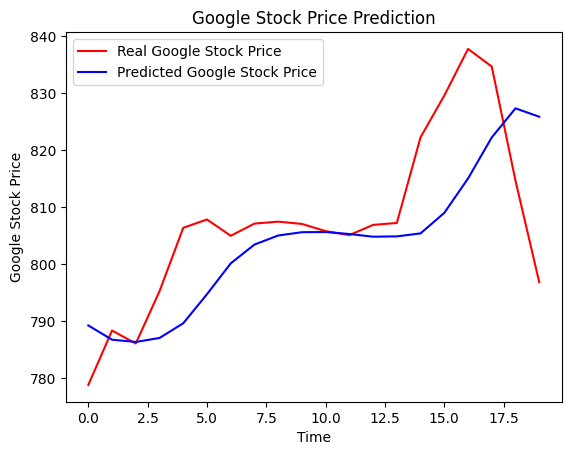

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()